# Section 1
## Trouver une solution brute-force

- action : part de l'entreprise
- coût : prix d'achat de l'action
- bénéfice : gain réalisé à la revente de l'action après 2 ans

 3 contraintes :
 1. L'action ne peut être acheté qu'une fois.
 2. Il ne peut être acheté de fraction d'action.
 3. 500 euros maximum peuvent être investis.

 Solution Brute-force : 
   - Générer toutes les combinaisons possibles d'actions.
   - Filtrer celles qui respectent la contrainte de budget.
   - Calculer le bénéfice pour chaque combinaison valide.
   - Sélectionner la combinaison avec le bénéfice maximum.


In [35]:
# Libraries necessary for data visualization and manipulation installations
%pip install matplotlib seaborn pandas
%pip install tabulate
%matplotlib widget


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


RuntimeError: 'widget' is not a recognised GUI loop or backend name

In [ ]:
"""Version 1 (Brute Force)"""

import csv
from itertools import combinations

def parse_benefit(coast, benefit_str):
    """Convertit le bénéfice en pourcentage vers une valeur absolue"""
    if isinstance(benefit_str, str) and benefit_str.endswith('%'):
        percentage = float(benefit_str.rstrip('%'))
        return (coast * percentage) / 100
    return float(benefit_str)

def read_actions_from_csv(file):
    """Lit les actions depuis un fichier CSV avec gestion des pourcentages"""
    actions = []
    with open(file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            coast = float(row['Coast'])
            benefit = parse_benefit(coast, row['Benefit'])
            actions.append({
                'name': row['Actions'],
                'coast': coast,
                'benefit': benefit
            })
    return actions

def find_best_combination(actions, max_budget=500):
    """Trouve la meilleure combinaison d'actions respectant le budget maximum"""
    best_combination = None
    max_benefit = 0
    n = len(actions)
    
    # Générer et évaluer toutes les combinaisons possibles
    for r in range(n + 1):
        for combo in combinations(actions, r):
            total_coast = sum(action['coast'] for action in combo)
            
            # Vérifier si la combinaison respecte le budget
            if total_coast <= max_budget:
                total_benefit = sum(action['benefit'] for action in combo)
                
                # Mettre à jour si c'est la meilleure combinaison
                if total_benefit > max_benefit:
                    max_benefit = total_benefit
                    best_combination = {
                        'actions': combo,
                        'total_coast': total_coast,
                        'total_benefit': total_benefit
                    }
    
    return best_combination

# Lecture des actions et recherche de la meilleure combinaison
actions = read_actions_from_csv('data/Actions.csv')
best = find_best_combination(actions)

# Affichage du résultat
if best:
    print(f"Best combination:")
    print(f"Total cost: {best['total_coast']:.2f} euros")
    print(f"Total benefit: {best['total_benefit']:.2f} euros")
    print(f"Selected actions:")
    for action in best['actions']:
        print(f"  - {action['name']}: {action['coast']:.2f}€ (benefit: {action['benefit']:.2f}€)")


Best combination:
Total cost: 498.00 euros
Total benefit: 99.08 euros
Selected actions:
  - Action-4: 70.00€ (benefit: 14.00€)
  - Action-5: 60.00€ (benefit: 10.20€)
  - Action-6: 80.00€ (benefit: 20.00€)
  - Action-8: 26.00€ (benefit: 2.86€)
  - Action-10: 34.00€ (benefit: 9.18€)
  - Action-11: 42.00€ (benefit: 7.14€)
  - Action-13: 38.00€ (benefit: 8.74€)
  - Action-18: 10.00€ (benefit: 1.40€)
  - Action-19: 24.00€ (benefit: 5.04€)
  - Action-20: 114.00€ (benefit: 20.52€)


# Section 2
## Optimiser l'agorithme

### Livrables : 
- programme Python optimisé
- présentation PPT avec :
    - analyse algo force brute
    - diagramme/organigramme/pseudocode décrivant la solution optimisé
    - algorithme de la version optimisé et cas limites
    - comparaison des performances en utilisant la notation Big-O, la complexité temporelle et l'analyse de la mémoire

### Quelles optimisations ?

*ATTENTION!* Avant toute chose modifier la lecture des fichiers. Les dataset n'ont pas les même en-têtes.

- calcul **ratio=price/profit**
- tri par ratio **croissant**
- sélection des **n** premiers jusqu'à ce que **price_total=500**
- Timsort ?
- 




In [64]:
"""Version 2 - Dataset_1 - Optimisé - Part 1 sorting by profitability"""

import csv
from tabulate import tabulate


def read_actions_from_csv(file):
    """Lit les actions depuis un fichier CSV avec gestion des pourcentages"""
    actions = []
    with open(file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            price = float(row['price'])
            profit = float(row['profit'])
            actions.append({
                'name': row['name'],
                'price': price,
                'profit': profit
            })
    return actions

def sort_actions_by_profitability(actions):
    """Trie les actions par rentabilité (profit / price) décroissante"""
    valid_actions = [action for action in actions if action['price'] > 0]
    
    # Ajouter le ratio de rentabilité à chaque action
    for action in valid_actions:
        action['profitability_ratio'] = action['profit'] / action['price']
    
    # Trier par ratio décroissant
    return sorted(valid_actions, key=lambda x: x['profitability_ratio'], reverse=True)

actions = read_actions_from_csv('data/dataset_1.csv')
sorted_actions_dataset1 = sort_actions_by_profitability(actions)

# Maintenant le tableau affichera aussi le ratio
print(tabulate(sorted_actions_dataset1, headers="keys"))


name          price    profit    profitability_ratio
----------  -------  --------  ---------------------
Share-MLGM     0.01     18.86         1886
Share-DBUJ     0.07     10.73          153.286
Share-KGQI     0.23     18.91           82.2174
Share-QSPX     0.6      35.15           58.5833
Share-HITN     0.67     33.49           49.9851
Share-CBNY     1.22     39.31           32.2213
Share-STKT     0.28      7.79           27.8214
Share-KXOH     1.5      32.19           21.46
Share-FKJR     0.8      14.73           18.4125
Share-RCCP     2.09     35.32           16.8995
Share-VNQN     1.17     18.51           15.8205
Share-CYYC     0.42      5.88           14
Share-CIIX     1.41     18.22           12.922
Share-GVVO     2.22     28.52           12.8468
Share-CUSU     2.66     32.49           12.2143
Share-KFOG     2.78     33.7            12.1223
Share-IYKD     1.08     13.02           12.0556
Share-UEZE     2.93     29.39           10.0307
Share-EVUW     4.44     39.22            8.8

## Graphique basé sur le dataset_1.csv (data/)




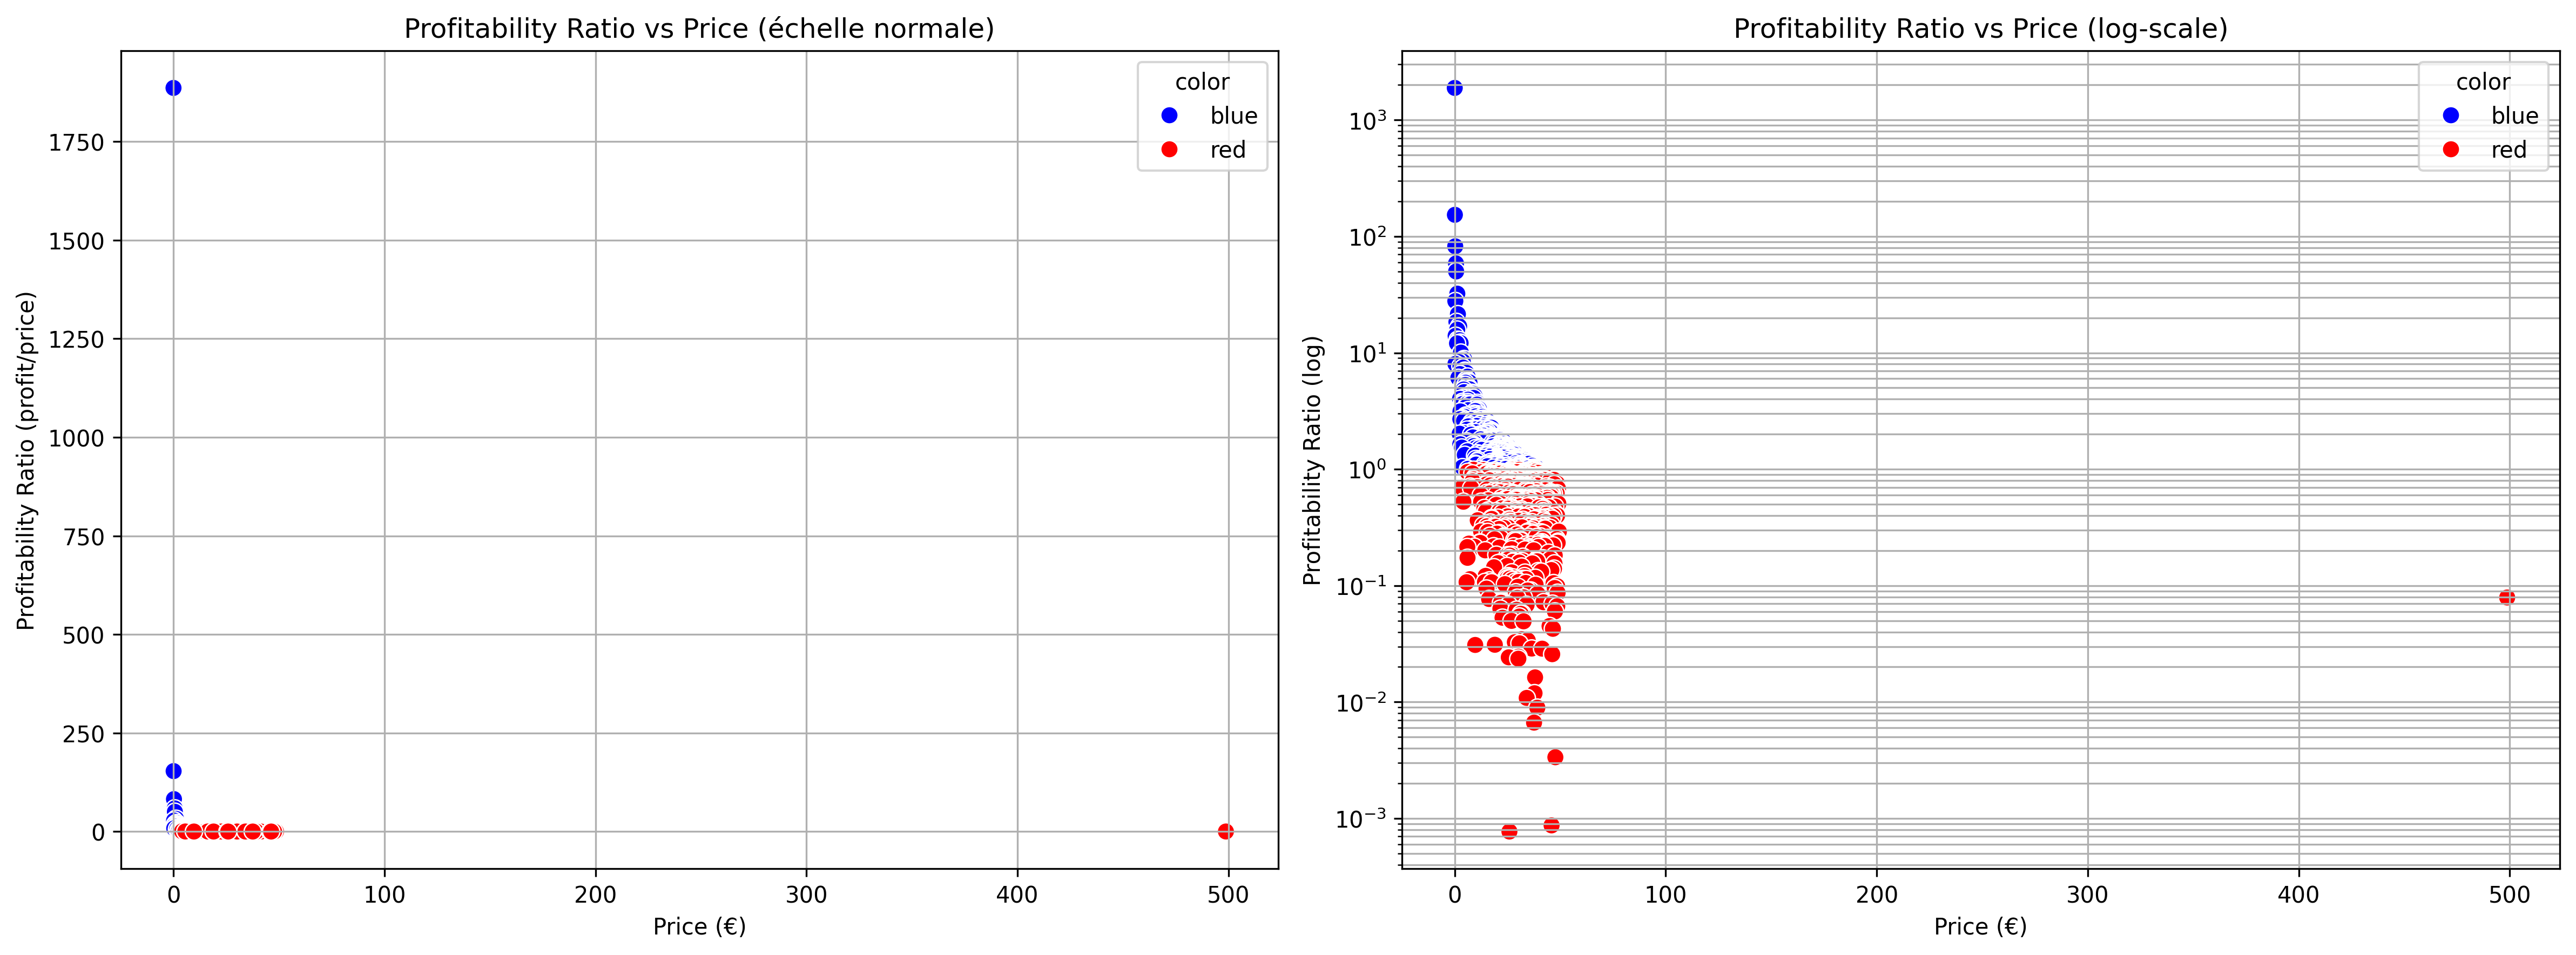

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(sorted_actions_dataset1)

# Coloration selon ton critère (< 1 → rouge, sinon bleu)
df['color'] = df['profitability_ratio'].apply(lambda v: 'red' if v < 1 else 'blue')

# ----------------------------
# Deux graphiques côte à côte
# ----------------------------
plt.figure(figsize=(16, 6), dpi=300)

# -------------------------
# GRAPHIQUE 1 : échelle normale
# -------------------------
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='price',
    y='profitability_ratio',
    hue='color',
    palette={'red': 'red', 'blue': 'blue'},
    s=60,
    marker='o'
)
plt.title("Profitability Ratio vs Price (échelle normale)")
plt.xlabel("Price (€)")
plt.ylabel("Profitability Ratio (profit/price)")
plt.grid(True)

# -------------------------
# GRAPHIQUE 2 : échelle logarithmique
# -------------------------
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='price',
    y='profitability_ratio',
    hue='color',
    palette={'red': 'red', 'blue': 'blue'},
    s=60,
    marker='o'
)
plt.yscale('log')  # <-- Échelle logarithmique
plt.title("Profitability Ratio vs Price (log-scale)")
plt.xlabel("Price (€)")
plt.ylabel("Profitability Ratio (log)")
plt.grid(True, which='both')

plt.tight_layout()   # évite le chevauchement
plt.show()


In [65]:
"""Version 2 - Dataset_2 - Optimisé - Part 1 sorting by profitability"""

import csv
from tabulate import tabulate


def read_actions_from_csv(file):
    """Lit les actions depuis un fichier CSV avec gestion des pourcentages"""
    actions = []
    with open(file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            price = float(row['price'])
            profit = float(row['profit'])
            actions.append({
                'name': row['name'],
                'price': price,
                'profit': profit
            })
    return actions

def sort_actions_by_profitability(actions):
    """Trie les actions par rentabilité (profit / price) décroissante"""
    valid_actions = [action for action in actions if action['price'] > 0]
    
    # Ajouter le ratio de rentabilité à chaque action
    for action in valid_actions:
        action['profitability_ratio'] = action['profit'] / action['price']
    
    # Trier par ratio décroissant
    return sorted(valid_actions, key=lambda x: x['profitability_ratio'], reverse=True)

actions = read_actions_from_csv('data/dataset_2.csv')
sorted_actions_dataset_2 = sort_actions_by_profitability(actions)

# Maintenant le tableau affichera aussi le ratio
print(tabulate(sorted_actions_dataset_2, headers="keys"))


name          price    profit    profitability_ratio
----------  -------  --------  ---------------------
Share-LKSD     0.12      9.14            76.1667
Share-DYVD     0.28     10.25            36.6071
Share-JMLZ     1.27     24.71            19.4567
Share-JWDZ     2.09     32.2             15.4067
Share-ZLMC     2.47     31.45            12.7328
Share-OCKK     3.16     36.39            11.5158
Share-LXZU     4.24     39.54             9.32547
Share-FUGM     1.94     16.83             8.67526
Share-BBNF     3.29     28.48             8.65653
Share-DSOO     1.49     12.11             8.12752
Share-BMHD     4.85     38.29             7.89485
Share-FFZA     4.57     34.5              7.54923
Share-MEQV     5.49     38.27             6.97086
Share-GEBJ     5.87     37.95             6.46508
Share-SCWM     6.42     38.1              5.93458
Share-FAKH     7.65     38.46             5.02745
Share-KOVS     3.3      15.43             4.67576
Share-DEPW     2.3      10.47             4.55217


## Graphique basé sur le dataset_2.csv (data/)

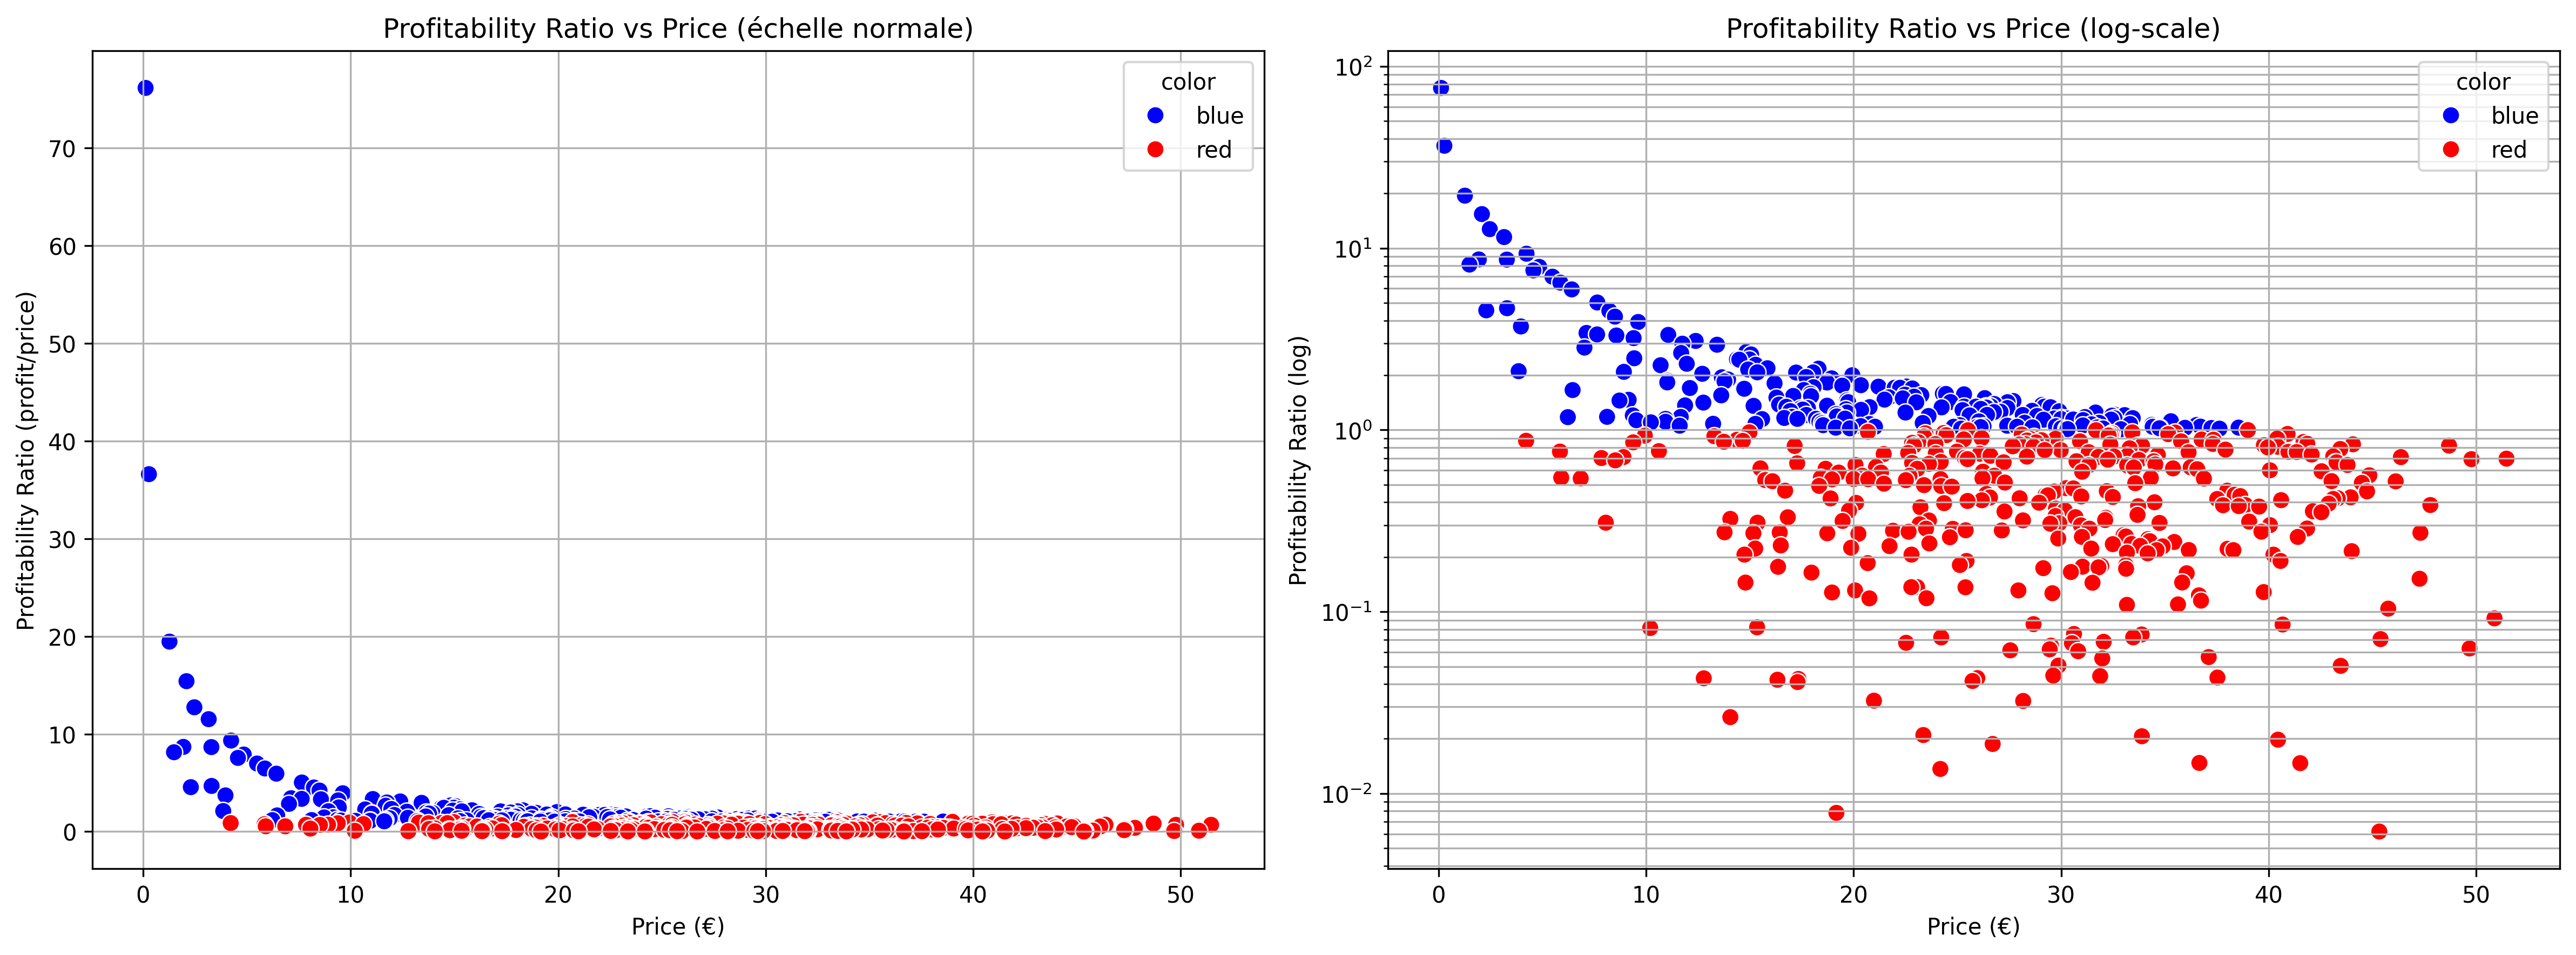

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(sorted_actions_dataset_2)

# Coloration selon ton critère (< 1 → rouge, sinon bleu)
df['color'] = df['profitability_ratio'].apply(lambda v: 'red' if v < 1 else 'blue')

# ----------------------------
# Deux graphiques côte à côte
# ----------------------------
plt.figure(figsize=(16, 6), dpi=300)

# -------------------------
# GRAPHIQUE 1 : échelle normale
# -------------------------
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='price',
    y='profitability_ratio',
    hue='color',
    palette={'red': 'red', 'blue': 'blue'},
    s=60,
    marker='o'
)
plt.title("Profitability Ratio vs Price (échelle normale)")
plt.xlabel("Price (€)")
plt.ylabel("Profitability Ratio (profit/price)")
plt.grid(True)

# -------------------------
# GRAPHIQUE 2 : échelle logarithmique
# -------------------------
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='price',
    y='profitability_ratio',
    hue='color',
    palette={'red': 'red', 'blue': 'blue'},
    s=60,
    marker='o'
)
plt.yscale('log')  # <-- Échelle logarithmique
plt.title("Profitability Ratio vs Price (log-scale)")
plt.xlabel("Price (€)")
plt.ylabel("Profitability Ratio (log)")
plt.grid(True, which='both')

plt.tight_layout()   # évite le chevauchement
plt.show()


# Section 3
## Backtestez et optimisez

Tester le programmer sur deux datasets et comparer les décisions d'achat.